In [1]:
import pandas as pd
import seaborn as sns

# Lendo dados e criando o DF

In [2]:
dados = pd.read_csv('dados/tips_atualizado.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
dados

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
# dic com as colunas para tradução e criação do novo dataframe
renomear = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'    
}

In [8]:
new_dados = dados.rename(columns = renomear)
new_dados

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


**A partir de agora utilzaremos o dataframe 'new_dados' e traduziremos as informações que estão nas linhas das suas colunas**

In [9]:
new_dados['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
# traduzindo os valores que estão na coluna sobremesa
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [12]:
new_dados['sobremesa'] = new_dados.sobremesa.map(sim_nao)

In [15]:
new_dados.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [17]:
new_dados.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [19]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sábado', 
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

In [20]:
new_dados.dia_da_semana = new_dados.dia_da_semana.map(dias)

In [21]:
new_dados.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [22]:
new_dados.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [23]:
refeicao = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [24]:
new_dados.hora_do_dia = new_dados.hora_do_dia.map(refeicao)

In [25]:
new_dados.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [26]:
new_dados

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.990000,1.010000,Não,Domingo,Jantar,2
1,10.340000,1.660000,Não,Domingo,Jantar,3
2,21.010000,3.500000,Não,Domingo,Jantar,3
3,23.680000,3.310000,Não,Domingo,Jantar,2
4,24.590000,3.610000,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3
3412,25.531567,1.604021,Sim,Sábado,Jantar,2
3413,21.547132,1.733914,Sim,Sábado,Jantar,2
3414,18.966233,1.718951,Não,Sábado,Jantar,2


# Análise 01 -> Valor da conta e gorjetas: relações entre si

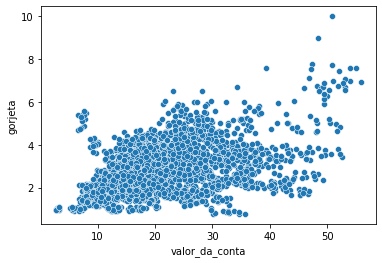

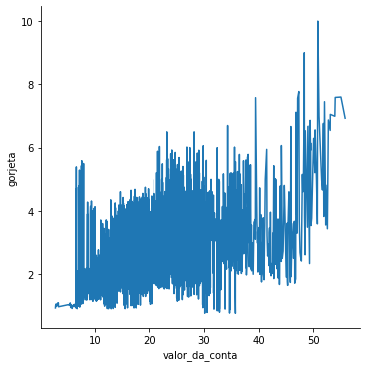

In [33]:
valor_conta_pela_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=new_dados)
valor_conta_pela_gorjeta_linha = sns.relplot(x='valor_da_conta', y='gorjeta', kind = 'line', data=new_dados)

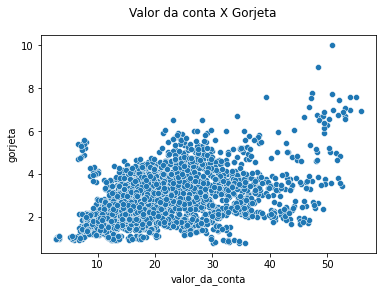

In [30]:
valor_conta_pela_gorjeta.figure.suptitle('Valor da conta X Gorjeta').get_figure()

**Percebe-se que o valor da gorjeta aumenta em relação ao valor da conta. Quanto maior a conta maior a gorjeta.**

In [35]:
new_dados.shape

(3416, 6)

In [36]:
print(f'A base de dados contém {new_dados.shape[0]} registros.')
print('Registros não nulos')
new_dados.count()

A base de dados contém 3416 registros.
Registros não nulos


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

## Criando a coluna que armazenará o valor da porcentagem das gorjetas pelos valores das contas

In [39]:
new_dados['porcentagem'] = (new_dados['gorjeta'] / new_dados['valor_da_conta']).round(2)

In [40]:
new_dados.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


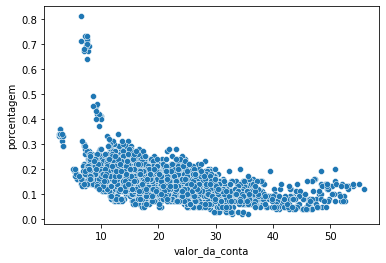

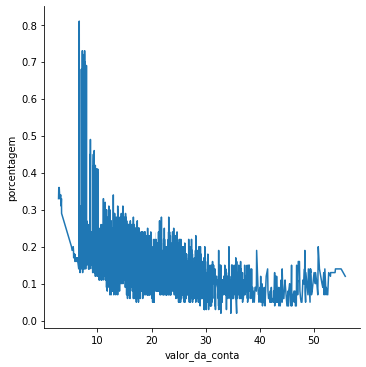

In [43]:
valor_conta_pela_porcentagem_gorjeta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=new_dados)
valor_conta_pela_porcentagem_gorjeta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind = 'line', data=new_dados)

**Percebe-se que quando maior o valor da conta, menor será o valor da gorjeta.**

# Análise 02 -> Sobremesas e gorjetas

In [44]:
new_dados.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [52]:
new_dados[new_dados.sobremesa == 'Não'].describe()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
count,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,0.150033
std,8.316030,1.024271,0.044248
min,6.533329,0.910509,0.040000
25%,13.281977,1.931135,0.120000
50%,17.736923,2.608222,0.150000
75%,22.749482,3.284578,0.180000
max,53.091371,9.000000,0.330000


In [53]:
new_dados[new_dados.sobremesa == 'Sim'].describe()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
count,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,0.153425
std,9.901358,1.162280,0.088961
min,2.799644,0.766203,0.020000
25%,13.495501,1.911661,0.090000
50%,17.917059,2.434354,0.150000
75%,26.807493,3.326298,0.190000
max,55.804318,10.000000,0.810000


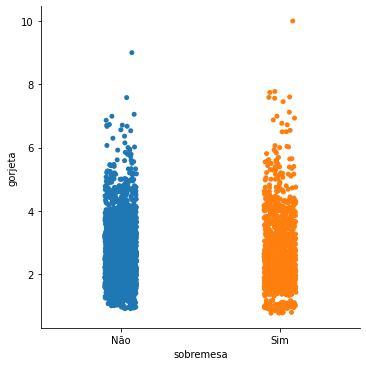

In [49]:
sns.catplot(x='sobremesa', y='gorjeta', data = new_dados)

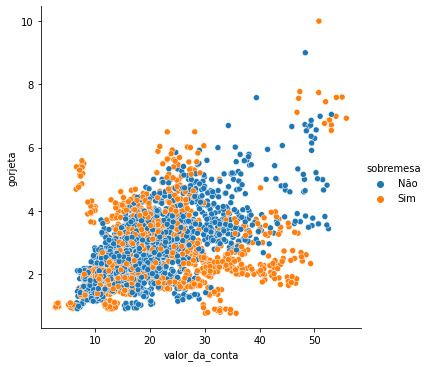

In [50]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',data = new_dados)

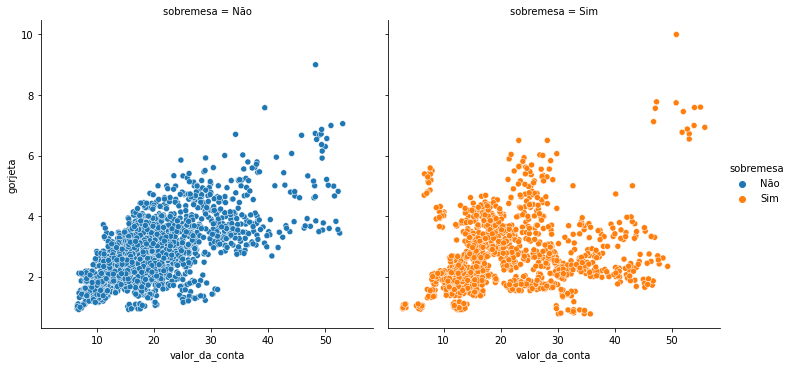

In [51]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col='sobremesa',data = new_dados)

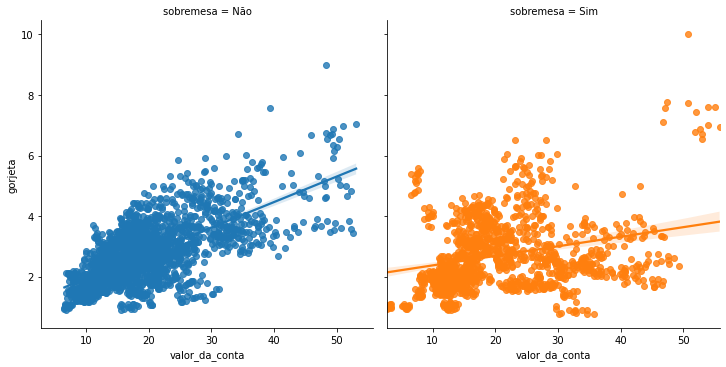

In [54]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=new_dados)

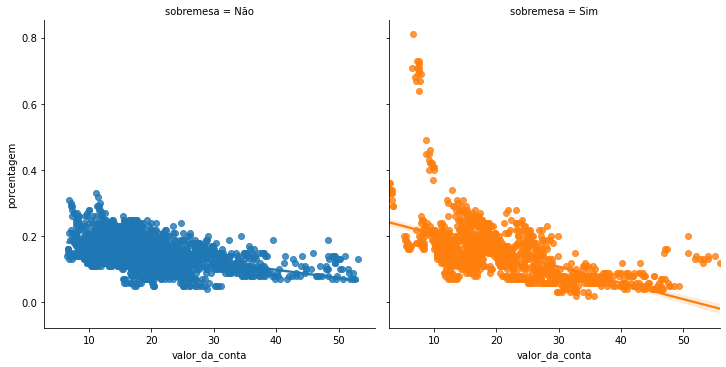

In [55]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=new_dados)

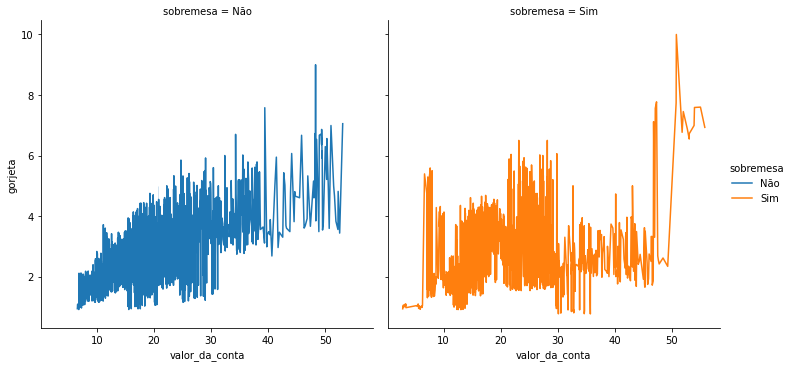

In [56]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', kind = 'line',col='sobremesa', data = new_dados)

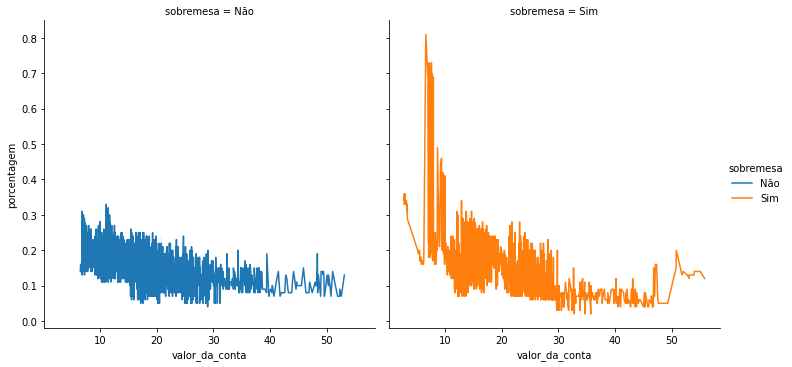

In [57]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', kind = 'line',col='sobremesa',data = new_dados)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram e não pediram sobremesas**

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta e a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não e a mesma nos dois grupos**

In [58]:
from scipy.stats import ranksums

In [59]:
sobremesa = new_dados.query('sobremesa == "Sim"').porcentagem
sobremesa

56      0.08
58      0.16
60      0.16
61      0.14
62      0.18
        ... 
3406    0.18
3408    0.09
3409    0.03
3412    0.06
3413    0.08
Name: porcentagem, Length: 1302, dtype: float64

In [60]:
sem_sobremesa = new_dados.query('sobremesa == "Não"').porcentagem
sem_sobremesa

0       0.06
1       0.16
2       0.17
3       0.14
4       0.15
        ... 
3407    0.12
3410    0.09
3411    0.18
3414    0.09
3415    0.16
Name: porcentagem, Length: 2114, dtype: float64

In [61]:
r = ranksums(sobremesa, sem_sobremesa)

In [62]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.033144013617673405


**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não e a mesma nos dois grupos**

# Análise 03 -> Dias da semana e gorjetas

In [67]:
new_dados[new_dados.dia_da_semana == 'Domingo'].describe()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
count,1064.000000,1064.000000,1064.000000
mean,21.439133,2.902079,0.154953
std,8.875192,0.993289,0.087811
min,6.557514,0.911648,0.040000
25%,15.009648,2.078202,0.110000
50%,19.607139,2.827927,0.140000
75%,26.689178,3.510444,0.180000
max,52.557375,6.500000,0.810000


In [68]:
new_dados[new_dados.dia_da_semana == 'Sábado'].describe()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
count,1218.000000,1218.000000,1218.000000
mean,20.480249,2.690114,0.143604
std,9.541906,1.245444,0.054711
min,2.799644,0.766203,0.020000
25%,13.974024,1.837554,0.110000
50%,18.475645,2.470138,0.140000
75%,24.811938,3.202726,0.180000
max,55.804318,10.000000,0.360000


In [69]:
new_dados[new_dados.dia_da_semana == 'Quinta'].describe()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
count,868.000000,868.000000,868.000000
mean,17.724088,2.556177,0.154090
std,7.941368,0.948590,0.044127
min,6.814390,1.049906,0.050000
25%,12.083441,1.886554,0.130000
50%,15.982836,2.201728,0.150000
75%,20.335657,3.249750,0.180000
max,47.002488,6.700000,0.310000


In [70]:
new_dados[new_dados.dia_da_semana == 'Sexta'].describe()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
count,266.000000,266.000000,266.000000
mean,17.215616,2.549960,0.163158
std,8.131997,0.848071,0.054404
min,5.195544,0.918138,0.060000
25%,12.048159,1.912379,0.120000
50%,14.949595,2.552198,0.150000
75%,21.798630,3.172537,0.200000
max,43.824979,4.730000,0.310000


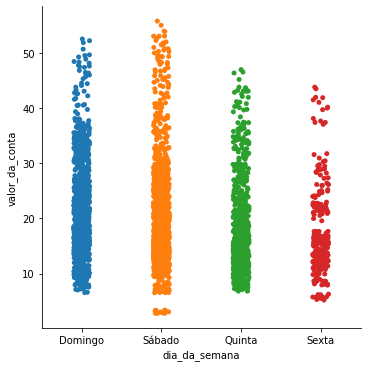

In [71]:
sns.catplot(x='dia_da_semana',y='valor_da_conta',data=new_dados)

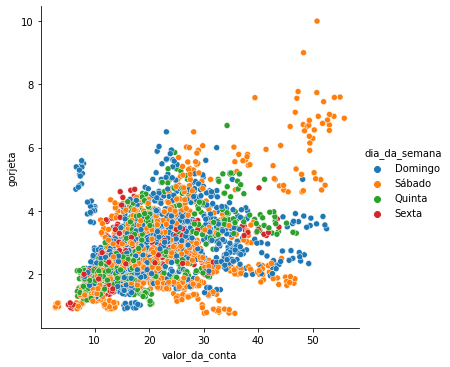

In [73]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data = new_dados)

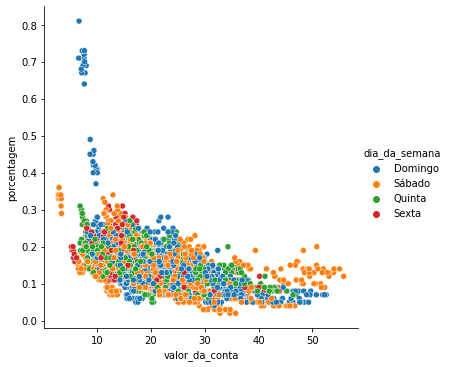

In [74]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data = new_dados)

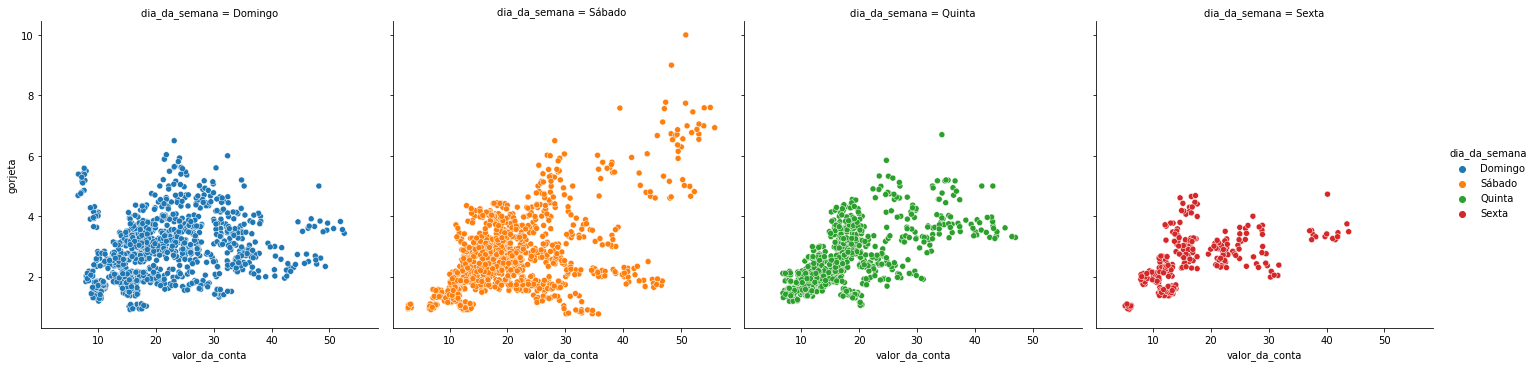

In [75]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana',data = new_dados)

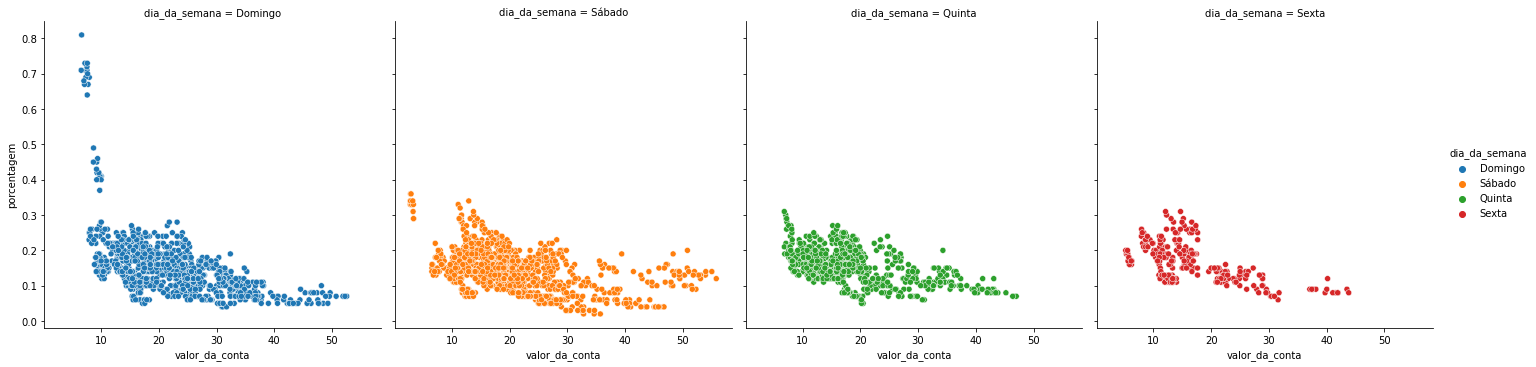

In [77]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana',data = new_dados)

In [78]:
media_geral_gorjetas = new_dados.gorjeta.mean()

In [79]:
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.7111892140916103


In [80]:
new_dados.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [81]:
print('Frequência dos dias:')
new_dados.dia_da_semana.value_counts()

Frequência dos dias:


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Testa de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [82]:
valor_conta_domingo = new_dados.query("dia_da_semana == 'Domingo'").valor_da_conta

In [83]:
valor_conta_sabado = new_dados.query("dia_da_semana == 'Sábado'").valor_da_conta

In [84]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [85]:
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.0004435935681441821


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

# Análise 04 -> Hora das refeições e gorjetas

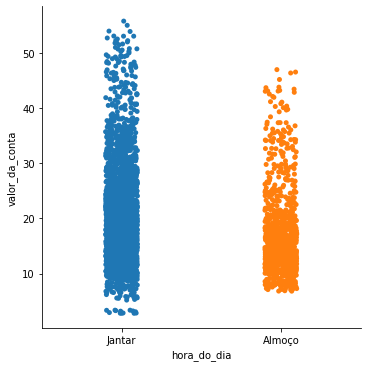

In [87]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data = new_dados)

C:\Users\allys\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\allys\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


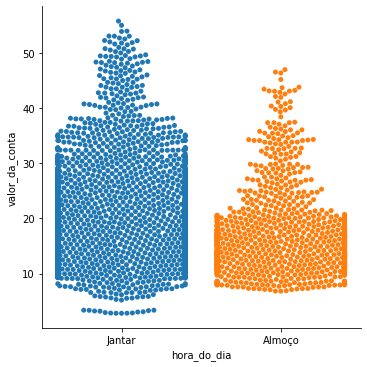

In [88]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind='swarm', data = new_dados)

In [89]:
new_dados[new_dados.hora_do_dia == 'Jantar'].describe()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
count,2464.000000,2464.000000,2464.000000
mean,20.832954,2.779458,0.148876
std,9.218549,1.124391,0.070945
min,2.799644,0.766203,0.020000
25%,14.308652,1.967295,0.110000
50%,18.890806,2.681272,0.140000
75%,25.664548,3.341210,0.180000
max,55.804318,10.000000,0.810000


In [90]:
new_dados[new_dados.hora_do_dia == 'Almoço'].describe()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
count,952.000000,952.000000,952.000000
mean,17.213913,2.534495,0.157668
std,7.767156,0.928157,0.045777
min,6.814390,1.049906,0.050000
25%,11.920566,1.883669,0.130000
50%,15.341824,2.191717,0.150000
75%,19.818736,3.207966,0.190000
max,47.002488,6.700000,0.310000


<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

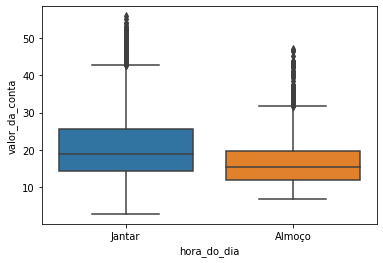

In [92]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data = new_dados)

In [93]:
almoco = new_dados.query("hora_do_dia == 'Almoço'").valor_da_conta

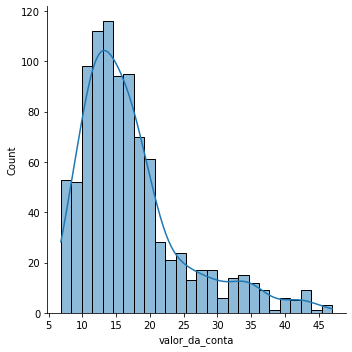

In [94]:
sns.displot(almoco, kde=True)

In [95]:
jantar = new_dados.query("hora_do_dia == 'Jantar'").valor_da_conta

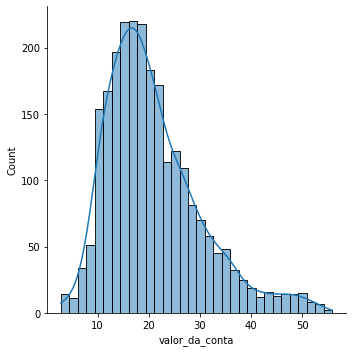

In [96]:
sns.displot(jantar, kde=True)

In [97]:
new_dados.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [99]:
r3 = ranksums(jantar,almoco)

In [100]:
print(f'O valor do p-value é de {r3.pvalue}')

O valor do p-value é de 5.169201062207143e-34


**H<sup>null</sup>**
> **A distribuição do valor da conta  é igual no jantar e no almoço**

## Teste de hipótese 2

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [102]:
porcentagem_almoco = new_dados.query("hora_do_dia == 'Almoço'").porcentagem

In [103]:
porcentagem_jantar = new_dados.query("hora_do_dia == 'Jantar'").porcentagem

In [104]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [105]:
print(f'O valor o p-value é de {r4.pvalue}')

O valor o p-value é de 1.3785725618355523e-11


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**